# Product Analytics

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.style.use('ggplot')

## Load Data

In [32]:
df = pd.read_excel(io='../data/Online Retail.xlsx', sheet_name='Online Retail')

In [33]:
df.shape

(541909, 8)

In [34]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Product Analytics

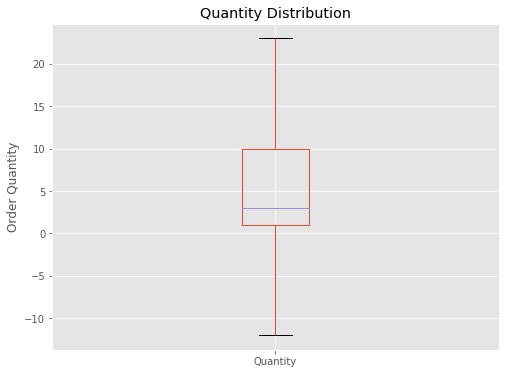

In [35]:
ax = df['Quantity'].plot.box(
    showfliers=False,
    figsize=(8, 6)
)
ax.set_ylabel('Order Quantity')
ax.set_title('Quantity Distribution')
plt.suptitle("")
plt.show()

In [36]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [37]:
monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()

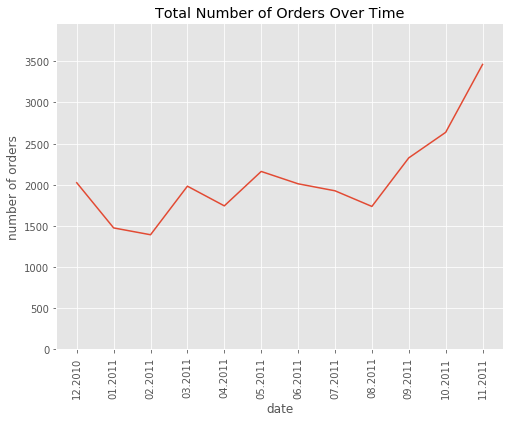

In [38]:
ax = pd.DataFrame(monthly_orders_df.values).plot(
    figsize=(8, 6),
    legend=False
)
ax.set_xlabel('date')
ax.set_ylabel('number of orders')
ax.set_title('Total Number of Orders Over Time')
ax.set_ylim([0, max(monthly_orders_df.values)+500])
plt.xticks(
    range(len(monthly_orders_df.index)), 
    [x.strftime('%m.%Y') for x in monthly_orders_df.index], 
    rotation=90
)
plt.show()

In [39]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [40]:
monthly_revenue_df = df.set_index('InvoiceDate')['Sales'].resample('M').sum()

In [41]:
monthly_revenue_df

InvoiceDate
2010-12-31     748957.020
2011-01-31     560000.260
2011-02-28     498062.650
2011-03-31     683267.080
2011-04-30     493207.121
2011-05-31     723333.510
2011-06-30     691123.120
2011-07-31     681300.111
2011-08-31     682680.510
2011-09-30    1019687.622
2011-10-31    1070704.670
2011-11-30    1461756.250
Freq: M, Name: Sales, dtype: float64

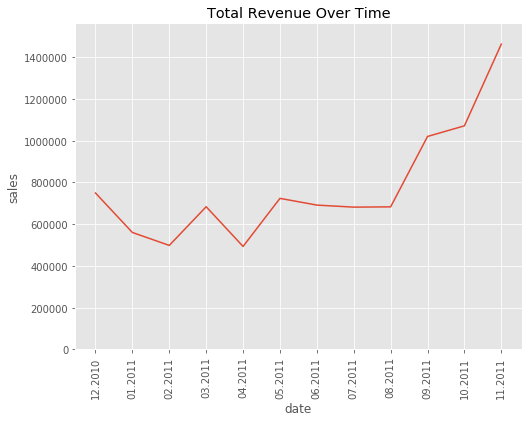

In [42]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(
    figsize=(8, 6),
    legend=False
)
ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue Over Time')
ax.set_ylim([0, max(monthly_revenue_df.values)+100000])
plt.xticks(
    range(len(monthly_revenue_df.index)), 
    [x.strftime('%m.%Y') for x in monthly_revenue_df.index], 
    rotation=90
)
plt.show()

In [43]:
invoice_customer_df = df.groupby(['InvoiceNo', 'InvoiceDate']).agg({
    'Sales': sum,
    'CustomerID': max,
    'Country': max,
}).reset_index()

In [44]:
monthly_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']

In [45]:
monthly_unique_customers_df = df.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()

In [46]:
monthly_repeat_percentage = monthly_repeat_customers_df / monthly_unique_customers_df * 100.0
monthly_repeat_percentage

InvoiceDate
2010-12-31    37.618546
2011-01-31    32.653061
2011-02-28    30.788486
2011-03-31    31.635651
2011-04-30    30.111111
2011-05-31    36.851852
2011-06-30    31.653992
2011-07-31    32.897384
2011-08-31    30.479103
2011-09-30    30.698388
2011-10-31    31.276297
2011-11-30    39.369159
Freq: M, Name: CustomerID, dtype: float64

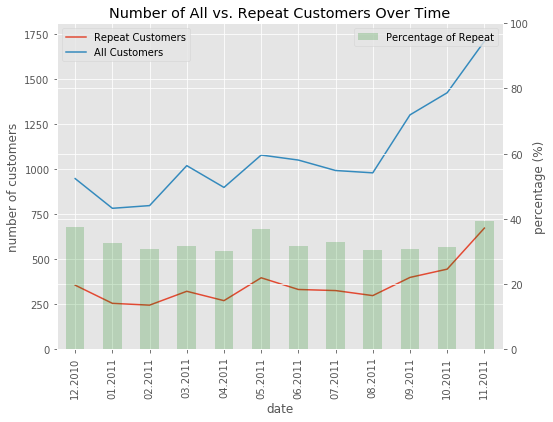

In [47]:
ax = pd.DataFrame(monthly_repeat_customers_df.values).plot(figsize=(8, 6))
pd.DataFrame(monthly_unique_customers_df.values).plot(ax=ax)
ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(
    ax=ax,
    grid=True,
    secondary_y=True,
    color='green',
    alpha=0.2
)
ax.set_xlabel('date')
ax.set_ylabel('number of customers')
ax.set_title('Number of All vs. Repeat Customers Over Time')
ax2.set_ylabel('percentage (%)')
ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')
ax.set_ylim([0, monthly_unique_customers_df.values.max()+100])
ax2.set_ylim([0, 100])
plt.xticks(
    range(len(monthly_repeat_customers_df.index)), 
    [x.strftime('%m.%Y') for x in monthly_repeat_customers_df.index], 
    rotation=90
)
plt.show()

In [48]:
monthly_rev_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').sum()['Sales']

In [49]:
monthly_rev_perc_repeat_customers_df = monthly_rev_repeat_customers_df/monthly_revenue_df * 100.0

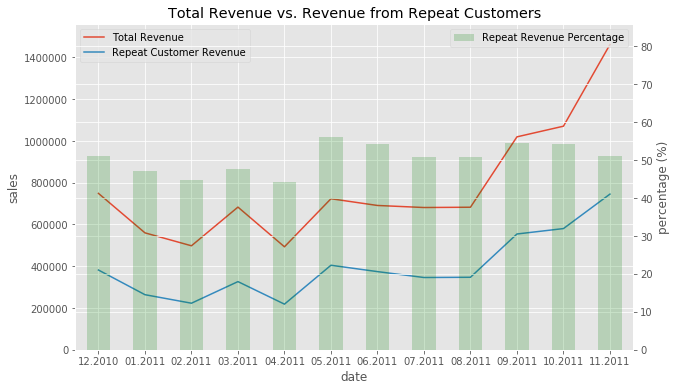

In [55]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(figsize=(10, 6))
pd.DataFrame(monthly_rev_repeat_customers_df.values).plot(
    ax=ax,
    grid=True,
)
ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue vs. Revenue from Repeat Customers')
ax.legend(['Total Revenue', 'Repeat Customer Revenue'])
ax.set_ylim([0, max(monthly_revenue_df.values)+100000])
ax2 = ax.twinx()
pd.DataFrame(monthly_rev_perc_repeat_customers_df.values).plot(
    ax=ax2,
    kind='bar',
    color='g',
    alpha=0.2
)
ax2.set_ylim([0, max(monthly_rev_perc_repeat_customers_df.values)+30])
ax2.set_ylabel('percentage (%)')
ax2.legend(['Repeat Revenue Percentage'])
ax2.set_xticklabels([x.strftime('%m.%Y') for x in monthly_rev_perc_repeat_customers_df.index])
plt.show()

In [56]:
date_item_df = pd.DataFrame(
    df.set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity'].sum()
)
date_item_df

Quantity
InvoiceDate StockCode          
2010-12-31  10002           251
            10120            16
            10125           154
            10133           130
            10135           411
...                         ...
2011-11-30  DCGSSGIRL         1
            DOT              47
            M              3659
            POST           1231
            S                -3

[32197 rows x 1 columns]

In [57]:
last_month_sorted_df = date_item_df.loc['2011-11-30'].sort_values(
    by='Quantity', ascending=False
).reset_index()
last_month_sorted_df

,InvoiceDate,StockCode,Quantity
0,2011-11-30,23084,14883
1,2011-11-30,84826,12551
2,2011-11-30,22197,12159
3,2011-11-30,22086,7868
4,2011-11-30,85099B,5807
...,...,...,...
2958,2011-11-30,72807B,-830
2959,2011-11-30,85204,-878
2960,2011-11-30,72807C,-888
2961,2011-11-30,85036B,-1258


In [58]:
# Regroup for top 5 items
date_item_df = pd.DataFrame(
    df.loc[
        df['StockCode'].isin([23084, 84826, 22197, 22086, '85099B'])
    ].set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity'].sum()
)
date_item_df

Quantity
InvoiceDate StockCode          
2010-12-31  22086          2453
            22197          2731
            84826           306
            85099B         2126
2011-01-31  22086            24
            22197          1809
            84826           480
            85099B         2639
2011-02-28  22086             5
            22197          2663
            84826            66
            85099B         3078
2011-03-31  22086            87
            22197          2798
            84826            60
            85099B         5281
2011-04-30  22086           -27
            22197          1856
            84826             1
            85099B         2452
2011-05-31  22086            17
            22197          6848
            23084          1131
            85099B         3617
2011-06-30  22086           344
            22197          2092
            23084          1693
            84826             4
            85099B         3676
2011-07-31  22086           377
            22197          1862
            23084           318
            84826             2
            85099B         3126
2011-08-31  22086           370
            22197          5416
            23084          1783
            84826            72
            85099B         5401
2011-09-30  22086          2106
            22197          4153
            23084           196
            85099B         4267
2011-10-31  22086          3189
            22197          5865
            23084          6344
            84826            11
            85099B         4803
2011-11-30  22086          7868
            22197         12159
            23084         14883
            84826         12551
            85099B         5807

In [59]:
trending_itmes_df = date_item_df.reset_index().pivot('InvoiceDate','StockCode').fillna(0)
trending_itmes_df = trending_itmes_df.reset_index()
trending_itmes_df = trending_itmes_df.set_index('InvoiceDate')
trending_itmes_df.columns = trending_itmes_df.columns.droplevel(0)
trending_itmes_df

StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2010-12-31,2453.0,2731.0,0.0,306.0,2126.0
2011-01-31,24.0,1809.0,0.0,480.0,2639.0
2011-02-28,5.0,2663.0,0.0,66.0,3078.0
2011-03-31,87.0,2798.0,0.0,60.0,5281.0
2011-04-30,-27.0,1856.0,0.0,1.0,2452.0
2011-05-31,17.0,6848.0,1131.0,0.0,3617.0
2011-06-30,344.0,2092.0,1693.0,4.0,3676.0
2011-07-31,377.0,1862.0,318.0,2.0,3126.0
2011-08-31,370.0,5416.0,1783.0,72.0,5401.0


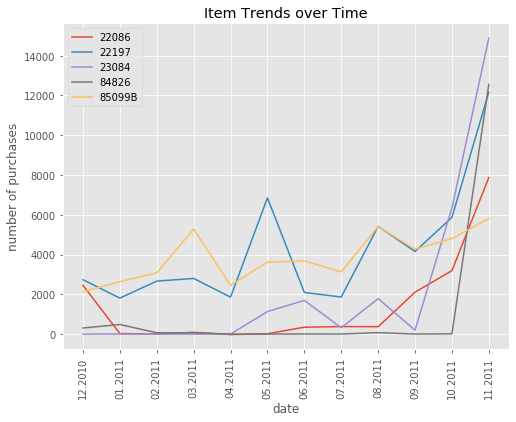

In [61]:
ax = pd.DataFrame(trending_itmes_df.values).plot(figsize=(8, 6))
ax.set_ylabel('number of purchases')
ax.set_xlabel('date')
ax.set_title('Item Trends over Time')
ax.legend(trending_itmes_df.columns, loc='upper left')
plt.xticks(
    range(len(trending_itmes_df.index)), 
    [x.strftime('%m.%Y') for x in trending_itmes_df.index], 
    rotation=90
)
plt.show()